# Imports

In [1]:
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
tqdm.pandas()
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.io
from sklearn.model_selection import train_test_split
import numpy as np 
from PIL import Image
import random

In [2]:
import pickle
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [3]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

In [4]:
# Import stopwords with nltk.
import nltk

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ht_13\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ht_13\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Data loading and Visualization

In [7]:
path = 'C:/Users/ht_13/OneDrive/Documents/6140-ML/Project/'
# load test result file
test_author = scipy.io.loadmat(path+'dataset/dataset/test_author.mat')["test_author"]
# load train dataFrame
train_df = pd.read_csv(path+'dataset/dataset/Gungor_2018_VictorianAuthorAttribution_data-train.csv',encoding = "ISO-8859-1")
# load train dataFrame
test_df = pd.read_csv(path+'dataset/dataset/Gungor_2018_VictorianAuthorAttribution_data.csv',encoding = "ISO-8859-1")
# load list of authors
f = open('author_list.txt', 'r')
author_list = f.read().split('\n')
f.close()

In [11]:
# print list of authers and create map dict
author_name_map_dict ={}
author_id_map_dict ={}
for i,author in enumerate(author_list):
    author_name_map_dict[author] = i
    author_id_map_dict[i] = author
    print(i+1, author)

1 Arthur Conan Doyle
2 Charles Darwin
3 Charles Dickens
4 Edith Wharton
5 George Eliot
6 Horace Greeley
7 Jack London
8 James Baldwin
9 Jane Austen
10 John Muir
11 Joseph Conrad
12 Mark Twain
13 Nathaniel Hawthorne
14 Ralph Emerson
15 Robert Louis Stevenson
16 Rudyard Kipling
17 Sinclair Lewis
18 Theodore Dreiser
19 Thomas Hardy
20 Walt Whitman
21 Washington Irving
22 William Carleton
23 Albert Ross
24 Anne Manning
25 Arlo Bates
26 Bret Harte
27 Catharine Maria Sedgwick
28 Charles Reade
29 Edward Eggleston
30 Fergus Hume
31 Frances Hodgson Burnett
32 George Moore
33 George William Curtis
34 Helen Mathers
35 Henry Rider Haggard
36 Isabella Lucy Bird
37 Jacob Abbott
38 James Grant
39 James Payn
40 John Kendrick Bangs
41 John Pendleton Kennedy
42 John Strange Winter
43 Lucas Malet
44 Marie Corelli
45 Oliver Optic
46 Sarah Orne Jewett
47 Sarah Stickney Ellis
48 Thomas Anstey Guthrie
49 Thomas Nelson Page
50 William Black


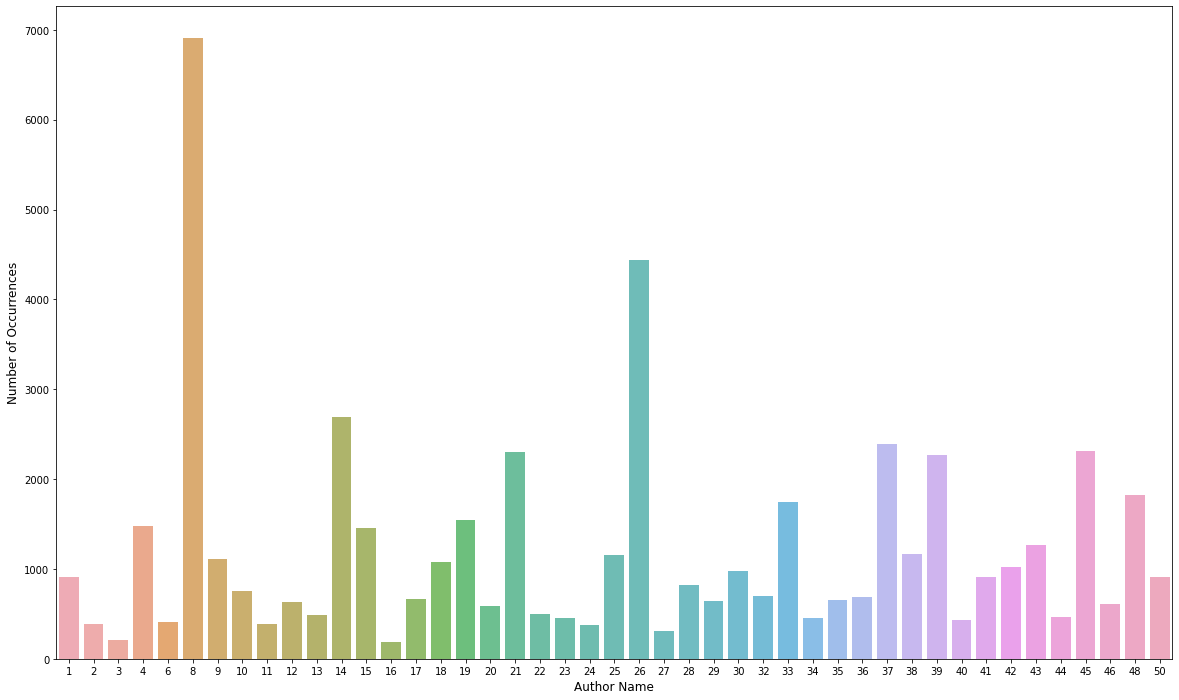

In [12]:
# plot class distribution for all the authors
cnt_srs = train_df['author'].value_counts()
plt.figure(figsize=(20,12))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Author Name', fontsize=12)
plt.show()

In [13]:
# printing number of train and test samples
print("Training sample number: ", train_df.shape)
print("Test sample number: ", test_df.shape)

Training sample number:  (53678, 2)
Test sample number:  (38809, 1)


In [14]:
train_df.head(n=5)

,text,author
0,ou have time to listen i will give you the ent...,1
1,wish for solitude he was twenty years of age a...,1
2,and the skirt blew in perfect freedom about th...,1
3,of san and the rows of shops opposite impresse...,1
4,an hour s walk was as tiresome as three in a s...,1


In [15]:
#Each line consists of 1000 words
str_list = train_df["text"][0].split(" ")
str_list = filter(None, str_list) 
len(list(str_list))

1000

## Preprocess

In [8]:
# remove stop words
train_df['text'] = train_df['text'].progress_apply(lambda words: ' '.join(word.lower() for word in words.split(' ') if word not in stop))
test_df['text'] = test_df['text'].progress_apply(lambda words: ' '.join(word.lower() for word in words.split(' ') if word not in stop))

100%|██████████████████████████████████████████████████████████████████████████| 38809/38809 [00:37<00:00, 1021.81it/s]


In [9]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'\w+')

def remove_punctuations(text_context):
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    new_words = tokenizer.tokenize(text_context)
    return ' '.join([word for word in new_words])

def stemming_data(text_content):
    words = word_tokenize(text_content)
    return ' '.join([stemmer.stem(word) for word in words])

def lemmatize_data(text_content):
    words = word_tokenize(text_content)
    return ' '.join([lemmatizer.lemmatize(word) for word in words])

In [ ]:
#Remove Punctuations
train_df['text'] = train_df['text'].progress_apply(lambda x: remove_punctuations(x))
test_df['text'] = test_df['text'].progress_apply(lambda x: remove_punctuations(x))

#Perform stemming
train_df['text'] = train_df['text'].progress_apply(lambda x: stemming_data(x))
test_df['text'] = test_df['text'].progress_apply(lambda x: stemming_data(x))

# and lemmatization
train_df['text'] = train_df['text'].progress_apply(lambda x: lemmatize_data(x))
test_df['text'] = test_df['text'].progress_apply(lambda x: lemmatize_data(x))

## Train validation Split

In [11]:
# split the data in train and validation set
xtrain, xvalid, ytrain, yvalid = train_test_split(train_df.text.values, train_df.author.values, 
                                                  stratify=train_df.author.values, 
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=True)
print ('Length of Training data:',xtrain.shape[0])
print ('Length of Validation data :',xvalid.shape[0])

Length of Training data: 42942
Length of Validation data : 10736


In [12]:
# split the data in train and validation set
df_train, df_val = train_test_split(train_df ,stratify=train_df.author.values, 
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=True)
train_df = None

## pure test data

In [13]:
test_df['author'] = test_author.reshape((test_df.shape[0]))
missing_authors = [5, 7, 31, 47, 49]
df_test = test_df.loc[~(test_df['author'].isin(missing_authors))]

In [29]:
xtest,ytest = df_test.text.values,df_test.author.values

## Random Forest

In [14]:
# embedding using TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
tfv = TfidfVectorizer(min_df=3,  max_features=10000, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

# Fitting TF-IDF to both training and validation sets
%time tfv.fit(list(xtrain) + list(xvalid))
%time xtrain_tfv =  tfv.transform(xtrain)
%time xvalid_tfv = tfv.transform(xvalid)

Wall time: 2min 23s
Wall time: 39.2 s
Wall time: 9.8 s


In [30]:
%time xtest_tfv = tfv.transform(xtest)

Wall time: 22.8 s


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
%time clf.fit(xtrain_tfv, ytrain)
print("Random Forest with TFIDF:", clf.score(xtrain_tfv, ytrain))
predictions = clf.predict(xvalid_tfv)
print(classification_report(yvalid, predictions))

Wall time: 3min 50s
Random Forest with TFIDF: 1.0
              precision    recall  f1-score   support

           1       0.98      0.29      0.44       182
           2       1.00      0.05      0.10        76
           3       1.00      0.19      0.31        43
           4       0.82      0.39      0.53       297
           6       1.00      0.19      0.31        81
           8       0.42      0.97      0.58      1383
           9       0.94      0.42      0.58       222
          10       0.99      0.77      0.87       151
          11       0.90      0.56      0.69        77
          12       0.96      0.18      0.31       125
          13       1.00      0.47      0.64        97
          14       0.84      0.79      0.81       539
          15       0.93      0.63      0.76       292
          16       1.00      0.19      0.32        37
          17       0.65      0.10      0.17       132
          18       0.92      0.43      0.59       216
          19       0.82      0.

In [16]:
import time

In [40]:
# embeddings using CountVectorizer
def trial_ctv(xtrain, xvalid):
    ctv = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}', stop_words = 'english')

    # Fitting Count Vectorizer to both training and test sets
    ctv.fit(list(xtrain) + list(xvalid))
    xtrain_ctv =  ctv.transform(xtrain) 
    xvalid_ctv = ctv.transform(xvalid)
    return xtrain_ctv, xvalid_ctv, ctv

start = time.time()
xtrain_ctv, xvalid_ctv, ctv = trial_ctv(xtrain, xvalid)
end = time.time()
print("Elapsed (with compilation) = %s" % (end - start))

Elapsed (with compilation) = 22.010324001312256


In [41]:
%time xtest_ctv = ctv.transform(xtest)

Wall time: 5.38 s


In [28]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
%time clf.fit(xtrain_ctv, ytrain)
print("Random Forest with CV:", clf.score(xtrain_ctv, ytrain))
predictions = clf.predict(xvalid_ctv)
print(classification_report(yvalid, predictions))

Wall time: 49min 15s
Random Forest with CV: 1.0
              precision    recall  f1-score   support

           1       1.00      0.02      0.04       182
           2       0.00      0.00      0.00        76
           3       0.00      0.00      0.00        43
           4       0.86      0.17      0.28       297
           6       1.00      0.15      0.26        81
           8       0.24      0.99      0.38      1383
           9       1.00      0.02      0.04       222
          10       1.00      0.59      0.74       151
          11       1.00      0.22      0.36        77
          12       0.00      0.00      0.00       125
          13       1.00      0.02      0.04        97
          14       0.96      0.55      0.70       539
          15       0.98      0.32      0.48       292
          16       1.00      0.19      0.32        37
          17       0.60      0.02      0.04       132
          18       0.97      0.15      0.26       216
          19       0.81      0.84

## SVM

In [18]:
from sklearn import svm
from sklearn.metrics import classification_report

clf = svm.SVC(kernel='linear',verbose=2)
%time clf.fit(xtrain_tfv, ytrain)
%time print("SVM with linear kernel and TFIDF Vectorizer:", clf.score(xtrain_tfv, ytrain))
predictions = clf.predict(xvalid_tfv)
print(classification_report(yvalid, predictions))

Wall time: 47min 13s
SVM with linear kernel and TFIDF Vectorizer: 0.9983000326021145
              precision    recall  f1-score   support

           1       0.98      0.99      0.99       182
           2       0.99      0.95      0.97        76
           3       1.00      1.00      1.00        43
           4       0.91      0.87      0.89       297
           6       1.00      0.98      0.99        81
           8       0.97      0.99      0.98      1383
           9       1.00      0.99      0.99       222
          10       1.00      0.99      0.99       151
          11       0.99      0.86      0.92        77
          12       1.00      0.98      0.99       125
          13       1.00      0.98      0.99        97
          14       1.00      1.00      1.00       539
          15       1.00      1.00      1.00       292
          16       0.97      0.81      0.88        37
          17       0.93      0.98      0.96       132
          18       0.99      1.00      0.99       

In [20]:
with open('SVM_tfv_linear.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [34]:
%time test_predictions = clf.predict(xtest_tfv)
%time print(classification_report(ytest, test_predictions))

              precision    recall  f1-score   support

           1       0.93      0.92      0.92       475
           2       0.86      0.26      0.40       125
           3       1.00      0.21      0.35       151
           4       0.62      0.90      0.74       992
           6       0.94      0.55      0.69       214
           8       0.80      0.99      0.88      3270
           9       0.97      0.82      0.89       503
          10       0.97      0.71      0.82       396
          11       0.67      0.76      0.71        98
          12       0.98      0.47      0.63       355
          13       1.00      0.54      0.70       323
          14       0.95      0.97      0.96      1228
          15       0.94      0.90      0.92       505
          16       1.00      0.31      0.48       215
          17       0.92      0.83      0.88       384
          18       0.89      0.76      0.82       753
          19       0.63      0.76      0.69       522
          20       0.99    

In [36]:
clf = svm.SVC(kernel='linear')
%time clf.fit(xtrain_ctv, ytrain)
# print("SVM with linear kernel and Count Vectorizer:", clf.score(xtrain_ctv, ytrain))
%time predictions = clf.predict(xvalid_ctv)
print(classification_report(yvalid, predictions))

Wall time: 28min 8s
Wall time: 10min 30s
              precision    recall  f1-score   support

           1       0.98      0.98      0.98       182
           2       0.96      0.88      0.92        76
           3       1.00      0.95      0.98        43
           4       0.88      0.85      0.86       297
           6       0.99      0.89      0.94        81
           8       0.96      0.99      0.97      1383
           9       0.99      0.96      0.98       222
          10       0.99      0.96      0.98       151
          11       0.97      0.83      0.90        77
          12       0.98      0.98      0.98       125
          13       0.98      0.97      0.97        97
          14       0.99      0.99      0.99       539
          15       0.98      0.98      0.98       292
          16       0.97      0.81      0.88        37
          17       0.93      0.96      0.94       132
          18       0.97      0.99      0.98       216
          19       0.96      0.97      0

In [37]:
with open('SVM_ctv_linear.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [42]:
%time test_predictions = clf.predict(xtest_ctv)
%time print(classification_report(ytest, test_predictions))

Wall time: 25min 8s
              precision    recall  f1-score   support

           1       0.85      0.89      0.87       475
           2       0.53      0.30      0.38       125
           3       0.90      0.35      0.50       151
           4       0.55      0.77      0.65       992
           6       0.77      0.42      0.54       214
           8       0.79      0.97      0.87      3270
           9       0.90      0.70      0.79       503
          10       0.94      0.69      0.80       396
          11       0.52      0.72      0.60        98
          12       0.88      0.32      0.47       355
          13       0.92      0.50      0.65       323
          14       0.89      0.94      0.92      1228
          15       0.87      0.78      0.82       505
          16       1.00      0.30      0.46       215
          17       0.80      0.73      0.76       384
          18       0.73      0.70      0.72       753
          19       0.64      0.75      0.69       522
       

In [ ]:
clf = svm.SVC(kernel='RBF', gamma=0.7, C = 1,verbose=2)
%time clf.fit(xtrain_tfv, ytrain)
print("SVM with RBF kernel and TFIDF Vectorizer:", clf.score(xtrain_tfv, ytrain))
predictions = clf.predict(xvalid_tfv)
print(classification_report(yvalid, predictions))

In [ ]:
clf = svm.SVC(kernel='RBF', gamma=0.7, C = 1,verbose=2)
%time clf.fit(xtrain_ctv, ytrain)
# print("SVM with RBF kernel and Count Vectorizer:", clf.score(xtrain_ctv, ytrain))
%time predictions = clf.predict(xvalid_ctv)
print(classification_report(yvalid, predictions))

In [ ]:
clf = svm.SVC(kernel='Polynomial', gamma=0.7, C = 1,verbose=2)
%time clf.fit(xtrain_tfv, ytrain)
print("SVM with Polynomial kernel and TFIDF Vectorizer:", clf.score(xtrain_tfv, ytrain))
predictions = clf.predict(xvalid_tfv)
print(classification_report(yvalid, predictions))

In [ ]:
clf = svm.SVC(kernel='Polynomial', gamma=0.7, C = 1,verbose=2)
%time clf.fit(xtrain_ctv, ytrain)
print("SVM with Polynomial kernel and Count Vectorizer:", clf.score(xtrain_ctv, ytrain))
predictions = clf.predict(xvalid_ctv)
print(classification_report(yvalid, predictions))

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(xtrain_ctv, ytrain) #Train Naive Bayes classifier
yv = clf.predict(xvalid_ctv) #validation set
print(classification_report(yvalid, yv)) #precision, recall and f1 score on the validation set
xtest = test_df.text.values
yt = test_author#test set
# Fitting Count Vectorizer to both test set
xtest_ctv =  ctv.transform(xtest) 
ytest = clf.predict(xtest_ctv) #test set
print(classification_report(yt, ytest)) #precision, recall and f1 score on t